# Practico 3: LR and NN

In [33]:
import utn_utils1  # funciones útiles de visualización para Aprendizaje Automático
import os
import pathlib
import seaborn as sns

In [30]:
os.getcwd()

'D:\\Users\\sebastian.castillo\\PycharmProjects\\research_tools\\utn_machine_learning\\3_RegresionLogistica_RedesNeuronales'

In [31]:
# Directorio Windows
datadirw = 'D:\\Users\\sebastian.castillo\\PycharmProjects\\research_tools\\data\\'
# Directorio Linux
#datadir = '/home/sebacastillo/PycharmProjects/research_tools/data/'

[[<matplotlib.axes._subplots.AxesSubplot object at 0x0000021A4ED60370>
	 210 datos para training
	 90 datos para testing


D:\Users\sebastian.castillo\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


*****************************************************
Train   Accuracy: 1.00
              precision    recall  f1-score   support

         0.0       1.00      0.99      1.00       108
         1.0       0.99      1.00      1.00       102

    accuracy                           1.00       210
   macro avg       1.00      1.00      1.00       210
weighted avg       1.00      1.00      1.00       210

*****************************************************
Test   Accuracy: 1.00
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        42
         1.0       1.00      1.00      1.00        48

    accuracy                           1.00        90
   macro avg       1.00      1.00      1.00        90
weighted avg       1.00      1.00      1.00        90

*****************************************************
Análisis de probabilidades: mean 0.91,  std 0.08


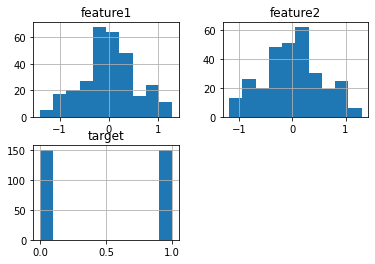

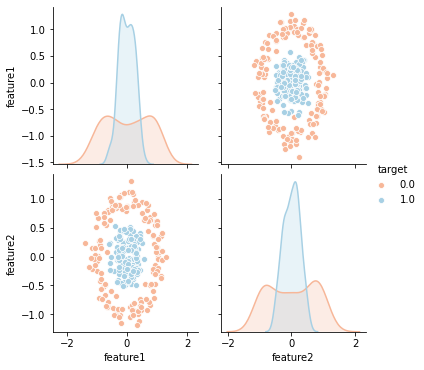

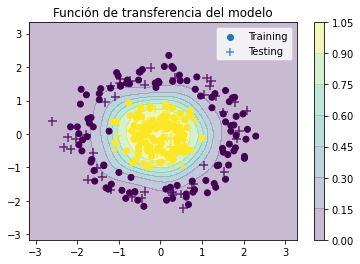

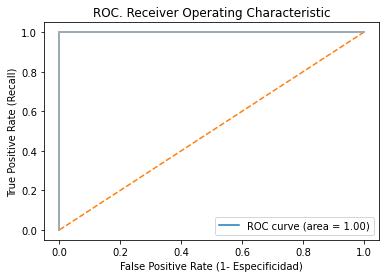

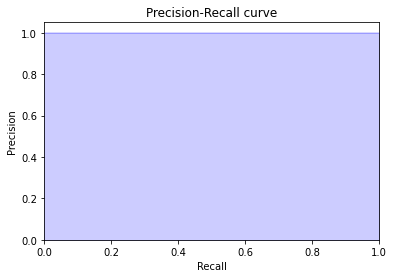

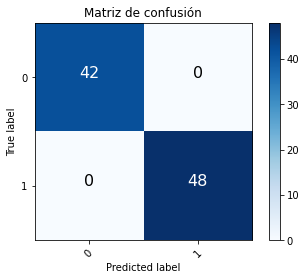

In [36]:
# %load Clasificacion_2D.py
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score,classification_report
import pandas as pd

#%% Cargar dataset
db_name= '2D_circulos.csv' # evaluar con otros data
df= pd.read_csv(datadir+ db_name)
data= df.values
x= data[:,0:-1]
y= data[:,-1] # suponemos que el target está en la última columna. Cuidado con esto!
n_clases= np.max(y)+1

print(df.hist());
sns.pairplot(data=df, hue='target', palette='RdBu')

#%% PARAM
PLOT_CONF_MAT= 1
PLOT_ROC= 1
PLOT_BOUNDARY= 1
PLOT_SIGMOID= 1
NORMALIZAR= 1

# parámetros de la red
LAYERS_SIZES= (20) # cantidad de neuronas ocultas en cada capa
MAX_ITE= 500
TOLERANCE=  1e-4 #tol : float, optional, default 1e-4
SOLVER= 'adam'##, sgd, adam, lbfgs
ACT_FX= 'tanh'#{identity, logistic, tanh, relu},
alpha= 0.003 #default=0.001

#%% Dividir Training/testing
porc_test= 0.3
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= porc_test)
print("\t %d datos para training" %x_train.shape[0])
print("\t %d datos para testing" %x_test.shape[0])

#%% Normalizar los datos
from sklearn.preprocessing import StandardScaler  
if (NORMALIZAR):
    scaler = StandardScaler()  
    # Don't cheat - fit only on training data
    scaler.fit(x_train)  
    x_train = scaler.transform(x_train)  
    # apply same transformation to test data
    x_test = scaler.transform(x_test)  
    # para los graficos
    x= scaler.transform(x)
    
#%% Entrenamiento del modelo
modelo= MLPClassifier(hidden_layer_sizes=LAYERS_SIZES, max_iter=MAX_ITE, tol= TOLERANCE, verbose= False, activation= ACT_FX, learning_rate_init=alpha, solver=SOLVER)
# modelo= LogisticRegression(class_weight={1:0.5, 0:0.5}) 
# puede probar con otros clasificadores. Ej. KNeighborsClassifier(n_neighbors=5)

modelo.fit(x_train,y_train)

# w= modelo.coefs_
# b= modelo.intercepts_

#%% eficacia del modelo
y_pred_train= modelo.predict(x_train)
print("*****************************************************")
print("Train   Accuracy: %.2f" % accuracy_score(y_train, y_pred_train ))
print(classification_report(y_train, y_pred_train))

y_pred= modelo.predict(x_test)
print("*****************************************************")
print("Test   Accuracy: %.2f" % accuracy_score(y_test, y_pred ))
print(classification_report(y_test, y_pred))
print("*****************************************************")

y_pred_proba= np.max(modelo.predict_proba(x_test), axis=1)
print("Análisis de probabilidades: mean %.2f,  std %.2f" % (y_pred_proba.mean(), y_pred_proba.std()))

#%% plot boundary
if ((PLOT_BOUNDARY) & (x.shape[1]==2)):
    utn_utils1.plot_frontera_de_decision_2D(modelo, x_train, y_train, x_test=x_test, y_test=y_test, sigmoid=PLOT_SIGMOID)

#%% ROC
if (PLOT_ROC & (n_clases==2)):
    utn_utils1.plot_ROC_curve(modelo, x_test, y_test)

#%% CONFUSION MATRIX
if (PLOT_CONF_MAT):
    y_pred= modelo.predict(x_test)
    utn_utils1.plot_confusion_matrix(y_test, y_pred)



Se entrenó modelo con MLP. La clasificación tuvo evaluación buena en todas las metricas pues los datos capturaban patrones claros de discriminación, como se ve en el gráfico en panel de los atributos. Algo curioso es que si se repite la ejecución del modelo, en algunos casos tengo error 0 y otras tengo error de clasificación 1.

# Segundo df

[[<matplotlib.axes._subplots.AxesSubplot object at 0x0000021A4D7A0AC0>
	 280 datos para training
	 120 datos para testing


D:\Users\sebastian.castillo\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


*****************************************************
Train   Accuracy: 0.98
              precision    recall  f1-score   support

         0.0       0.98      0.98      0.98       135
         1.0       0.98      0.98      0.98       145

    accuracy                           0.98       280
   macro avg       0.98      0.98      0.98       280
weighted avg       0.98      0.98      0.98       280

*****************************************************
Test   Accuracy: 0.97
              precision    recall  f1-score   support

         0.0       0.98      0.97      0.98        65
         1.0       0.96      0.98      0.97        55

    accuracy                           0.97       120
   macro avg       0.97      0.98      0.97       120
weighted avg       0.98      0.97      0.98       120

*****************************************************
Análisis de probabilidades: mean 0.95,  std 0.09


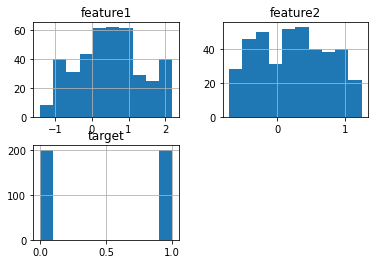

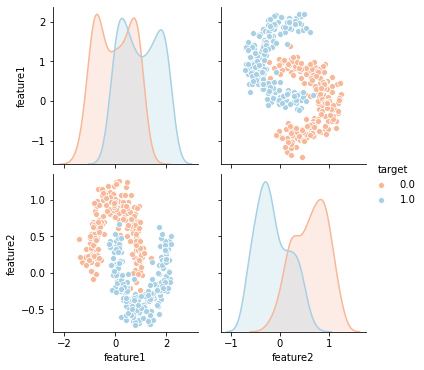

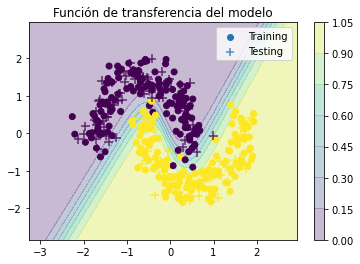

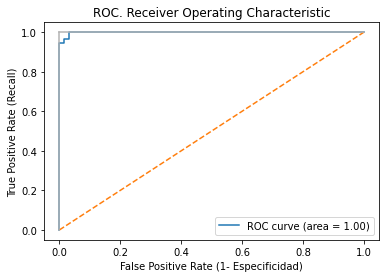

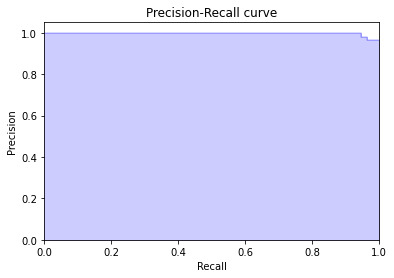

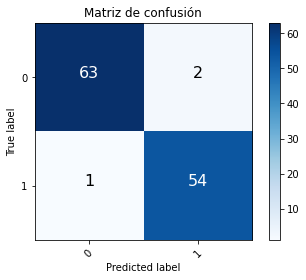

In [40]:
# %load Clasificacion_2D.py
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score,classification_report
import pandas as pd

#%% Cargar dataset
db_name= '2D_moons.csv' # evaluar con otros data
df= pd.read_csv(datadir+ db_name)
data= df.values
x= data[:,0:-1]
y= data[:,-1] # suponemos que el target está en la última columna. Cuidado con esto!
n_clases= np.max(y)+1

print(df.hist())
sns.pairplot(data=df, hue='target', palette='RdBu')

#%% PARAM
PLOT_CONF_MAT= 1
PLOT_ROC= 1
PLOT_BOUNDARY= 1
PLOT_SIGMOID= 1
NORMALIZAR= 1

# parámetros de la red
LAYERS_SIZES= (20) # cantidad de neuronas ocultas en cada capa
MAX_ITE= 500
TOLERANCE=  1e-4 #tol : float, optional, default 1e-4
SOLVER= 'adam'##, sgd, adam, lbfgs
ACT_FX= 'tanh'#{identity, logistic, tanh, relu},
alpha= 0.003 #default=0.001

#%% Dividir Training/testing
porc_test= 0.3
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= porc_test)
print("\t %d datos para training" %x_train.shape[0])
print("\t %d datos para testing" %x_test.shape[0])

#%% Normalizar los datos
from sklearn.preprocessing import StandardScaler  
if (NORMALIZAR):
    scaler = StandardScaler()  
    # Don't cheat - fit only on training data
    scaler.fit(x_train)  
    x_train = scaler.transform(x_train)  
    # apply same transformation to test data
    x_test = scaler.transform(x_test)  
    # para los graficos
    x= scaler.transform(x)
    
#%% Entrenamiento del modelo
modelo= MLPClassifier(hidden_layer_sizes=LAYERS_SIZES, max_iter=MAX_ITE, tol= TOLERANCE, verbose= False, activation= ACT_FX, learning_rate_init=alpha, solver=SOLVER)
# modelo= LogisticRegression(class_weight={1:0.5, 0:0.5}) 
# puede probar con otros clasificadores. Ej. KNeighborsClassifier(n_neighbors=5)

modelo.fit(x_train,y_train)

# w= modelo.coefs_
# b= modelo.intercepts_

#%% eficacia del modelo
y_pred_train= modelo.predict(x_train)
print("*****************************************************")
print("Train   Accuracy: %.2f" % accuracy_score(y_train, y_pred_train ))
print(classification_report(y_train, y_pred_train))

y_pred= modelo.predict(x_test)
print("*****************************************************")
print("Test   Accuracy: %.2f" % accuracy_score(y_test, y_pred ))
print(classification_report(y_test, y_pred))
print("*****************************************************")

y_pred_proba= np.max(modelo.predict_proba(x_test), axis=1)
print("Análisis de probabilidades: mean %.2f,  std %.2f" % (y_pred_proba.mean(), y_pred_proba.std()))

#%% plot boundary
if ((PLOT_BOUNDARY) & (x.shape[1]==2)):
    utn_utils1.plot_frontera_de_decision_2D(modelo, x_train, y_train, x_test=x_test, y_test=y_test, sigmoid=PLOT_SIGMOID)

#%% ROC
if (PLOT_ROC & (n_clases==2)):
    utn_utils1.plot_ROC_curve(modelo, x_test, y_test)

#%% CONFUSION MATRIX
if (PLOT_CONF_MAT):
    y_pred= modelo.predict(x_test)
    utn_utils1.plot_confusion_matrix(y_test, y_pred)



Los resultados, como en el caso anterior son muy buneos, la clasificación tiene un *accuracy, precision and recall* de 0.96. En la primera ejecución del modelo hay 2 falsos positivos y un falso negativo. En la segunda ejecución hay 3 falsos positivos y 1 falso negativo. En la tercera hay 5 falsos positivos y 2 falsos negativos. En la cuarta volvió a ajustar las predicciones y tuvo 2 falsos positivos y 1 falso negativo.

[[<matplotlib.axes._subplots.AxesSubplot object at 0x0000021A4DB22B20>
	 3500 datos para training
	 1500 datos para testing
*****************************************************
Train   Accuracy: 1.00
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      3442
         1.0       0.94      0.78      0.85        58

    accuracy                           1.00      3500
   macro avg       0.97      0.89      0.92      3500
weighted avg       1.00      1.00      1.00      3500

*****************************************************
Test   Accuracy: 1.00
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1479
         1.0       0.89      0.81      0.85        21

    accuracy                           1.00      1500
   macro avg       0.95      0.90      0.92      1500
weighted avg       1.00      1.00      1.00      1500

*****************************************************
Análisis de pro

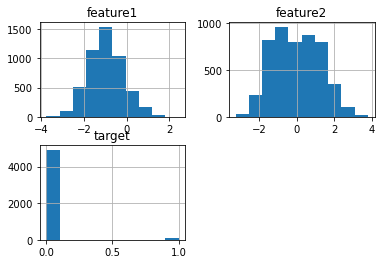

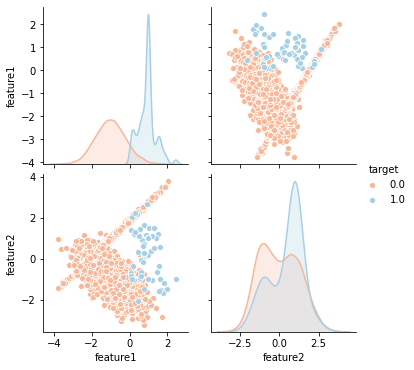

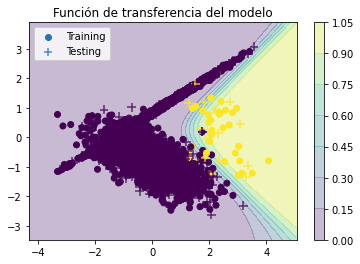

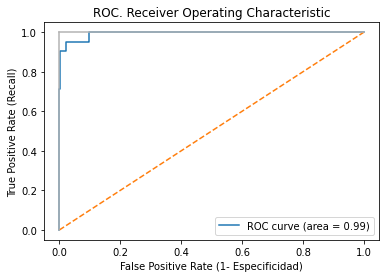

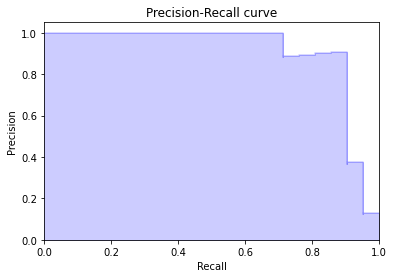

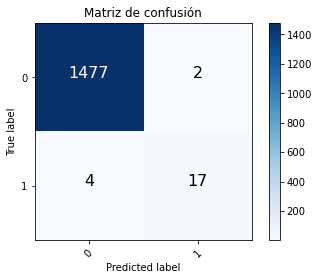

In [41]:
# %load Clasificacion_2D.py
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score,classification_report
import pandas as pd

#%% Cargar dataset
db_name= '2D_not_linear_clases.csv' # evaluar con otros data
df= pd.read_csv(datadir+ db_name)
data= df.values
x= data[:,0:-1]
y= data[:,-1] # suponemos que el target está en la última columna. Cuidado con esto!
n_clases= np.max(y)+1

print(df.hist())
sns.pairplot(data=df, hue='target', palette='RdBu')

#%% PARAM
PLOT_CONF_MAT= 1
PLOT_ROC= 1
PLOT_BOUNDARY= 1
PLOT_SIGMOID= 1
NORMALIZAR= 1

# parámetros de la red
LAYERS_SIZES= (20) # cantidad de neuronas ocultas en cada capa
MAX_ITE= 500
TOLERANCE=  1e-4 #tol : float, optional, default 1e-4
SOLVER= 'adam'##, sgd, adam, lbfgs
ACT_FX= 'tanh'#{identity, logistic, tanh, relu},
alpha= 0.003 #default=0.001

#%% Dividir Training/testing
porc_test= 0.3
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= porc_test)
print("\t %d datos para training" %x_train.shape[0])
print("\t %d datos para testing" %x_test.shape[0])

#%% Normalizar los datos
from sklearn.preprocessing import StandardScaler  
if (NORMALIZAR):
    scaler = StandardScaler()  
    # Don't cheat - fit only on training data
    scaler.fit(x_train)  
    x_train = scaler.transform(x_train)  
    # apply same transformation to test data
    x_test = scaler.transform(x_test)  
    # para los graficos
    x= scaler.transform(x)
    
#%% Entrenamiento del modelo
modelo= MLPClassifier(hidden_layer_sizes=LAYERS_SIZES, max_iter=MAX_ITE, tol= TOLERANCE, verbose= False, activation= ACT_FX, learning_rate_init=alpha, solver=SOLVER)
# modelo= LogisticRegression(class_weight={1:0.5, 0:0.5}) 
# puede probar con otros clasificadores. Ej. KNeighborsClassifier(n_neighbors=5)

modelo.fit(x_train,y_train)

# w= modelo.coefs_
# b= modelo.intercepts_

#%% eficacia del modelo
y_pred_train= modelo.predict(x_train)
print("*****************************************************")
print("Train   Accuracy: %.2f" % accuracy_score(y_train, y_pred_train ))
print(classification_report(y_train, y_pred_train))

y_pred= modelo.predict(x_test)
print("*****************************************************")
print("Test   Accuracy: %.2f" % accuracy_score(y_test, y_pred ))
print(classification_report(y_test, y_pred))
print("*****************************************************")

y_pred_proba= np.max(modelo.predict_proba(x_test), axis=1)
print("Análisis de probabilidades: mean %.2f,  std %.2f" % (y_pred_proba.mean(), y_pred_proba.std()))

#%% plot boundary
if ((PLOT_BOUNDARY) & (x.shape[1]==2)):
    utn_utils1.plot_frontera_de_decision_2D(modelo, x_train, y_train, x_test=x_test, y_test=y_test, sigmoid=PLOT_SIGMOID)

#%% ROC
if (PLOT_ROC & (n_clases==2)):
    utn_utils1.plot_ROC_curve(modelo, x_test, y_test)

#%% CONFUSION MATRIX
if (PLOT_CONF_MAT):
    y_pred= modelo.predict(x_test)
    utn_utils1.plot_confusion_matrix(y_test, y_pred)



El *accuracy* es perfecto en train y test. Las clases están muy desbalanceadas, poco valores de la clase1. 

[[<matplotlib.axes._subplots.AxesSubplot object at 0x0000021A4EC36850>
	 3500 datos para training
	 1500 datos para testing
*****************************************************
Train   Accuracy: 0.99
              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99      3149
         1.0       0.97      0.94      0.95       351

    accuracy                           0.99      3500
   macro avg       0.98      0.97      0.97      3500
weighted avg       0.99      0.99      0.99      3500

*****************************************************
Test   Accuracy: 0.99
              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00      1326
         1.0       0.98      0.95      0.96       174

    accuracy                           0.99      1500
   macro avg       0.98      0.97      0.98      1500
weighted avg       0.99      0.99      0.99      1500

*****************************************************
Análisis de pro

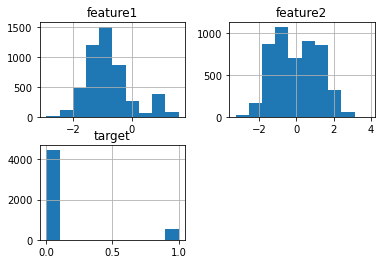

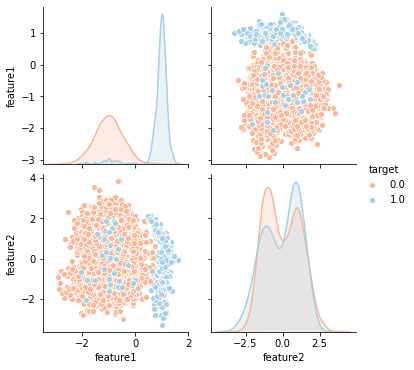

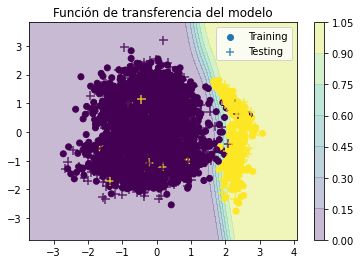

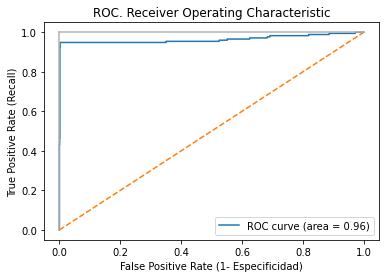

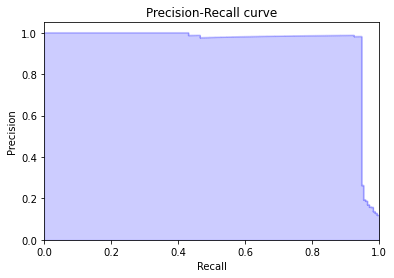

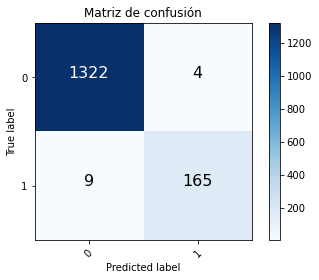

In [42]:
# %load Clasificacion_2D.py
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score,classification_report
import pandas as pd

#%% Cargar dataset
db_name= '2D_unbalanced.csv' # evaluar con otros data
df= pd.read_csv(datadir+ db_name)
data= df.values
x= data[:,0:-1]
y= data[:,-1] # suponemos que el target está en la última columna. Cuidado con esto!
n_clases= np.max(y)+1

print(df.hist())
sns.pairplot(data=df, hue='target', palette='RdBu')

#%% PARAM
PLOT_CONF_MAT= 1
PLOT_ROC= 1
PLOT_BOUNDARY= 1
PLOT_SIGMOID= 1
NORMALIZAR= 1

# parámetros de la red
LAYERS_SIZES= (20) # cantidad de neuronas ocultas en cada capa
MAX_ITE= 500
TOLERANCE=  1e-4 #tol : float, optional, default 1e-4
SOLVER= 'adam'##, sgd, adam, lbfgs
ACT_FX= 'tanh'#{identity, logistic, tanh, relu},
alpha= 0.003 #default=0.001

#%% Dividir Training/testing
porc_test= 0.3
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= porc_test)
print("\t %d datos para training" %x_train.shape[0])
print("\t %d datos para testing" %x_test.shape[0])

#%% Normalizar los datos
from sklearn.preprocessing import StandardScaler  
if (NORMALIZAR):
    scaler = StandardScaler()  
    # Don't cheat - fit only on training data
    scaler.fit(x_train)  
    x_train = scaler.transform(x_train)  
    # apply same transformation to test data
    x_test = scaler.transform(x_test)  
    # para los graficos
    x= scaler.transform(x)
    
#%% Entrenamiento del modelo
modelo= MLPClassifier(hidden_layer_sizes=LAYERS_SIZES, max_iter=MAX_ITE, tol= TOLERANCE, verbose= False, activation= ACT_FX, learning_rate_init=alpha, solver=SOLVER)
# modelo= LogisticRegression(class_weight={1:0.5, 0:0.5}) 
# puede probar con otros clasificadores. Ej. KNeighborsClassifier(n_neighbors=5)

modelo.fit(x_train,y_train)

# w= modelo.coefs_
# b= modelo.intercepts_

#%% eficacia del modelo
y_pred_train= modelo.predict(x_train)
print("*****************************************************")
print("Train   Accuracy: %.2f" % accuracy_score(y_train, y_pred_train ))
print(classification_report(y_train, y_pred_train))

y_pred= modelo.predict(x_test)
print("*****************************************************")
print("Test   Accuracy: %.2f" % accuracy_score(y_test, y_pred ))
print(classification_report(y_test, y_pred))
print("*****************************************************")

y_pred_proba= np.max(modelo.predict_proba(x_test), axis=1)
print("Análisis de probabilidades: mean %.2f,  std %.2f" % (y_pred_proba.mean(), y_pred_proba.std()))

#%% plot boundary
if ((PLOT_BOUNDARY) & (x.shape[1]==2)):
    utn_utils1.plot_frontera_de_decision_2D(modelo, x_train, y_train, x_test=x_test, y_test=y_test, sigmoid=PLOT_SIGMOID)

#%% ROC
if (PLOT_ROC & (n_clases==2)):
    utn_utils1.plot_ROC_curve(modelo, x_test, y_test)

#%% CONFUSION MATRIX
if (PLOT_CONF_MAT):
    y_pred= modelo.predict(x_test)
    utn_utils1.plot_confusion_matrix(y_test, y_pred)



Idem anterior.

[[<matplotlib.axes._subplots.AxesSubplot object at 0x0000021A4D12F8B0>
	 1050 datos para training
	 450 datos para testing


D:\Users\sebastian.castillo\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


*****************************************************
Train   Accuracy: 0.95
              precision    recall  f1-score   support

         0.0       1.00      0.98      0.99       177
         1.0       0.98      0.99      0.99       171
         2.0       0.96      0.98      0.97       162
         3.0       0.99      0.98      0.99       181
         4.0       0.91      0.88      0.89       176
         5.0       0.89      0.91      0.90       183

    accuracy                           0.95      1050
   macro avg       0.95      0.95      0.95      1050
weighted avg       0.95      0.95      0.95      1050

*****************************************************
Test   Accuracy: 0.97
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        73
         1.0       0.98      1.00      0.99        79
         2.0       1.00      0.98      0.99        88
         3.0       1.00      1.00      1.00        69
         4.0       0.96      0.86

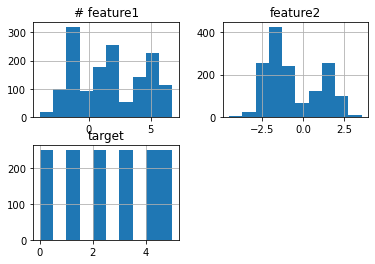

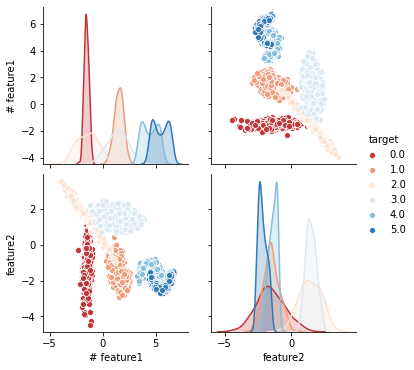

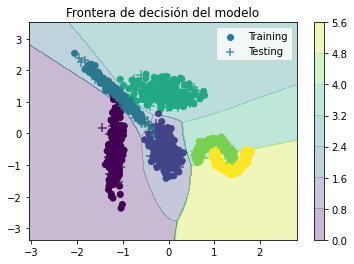

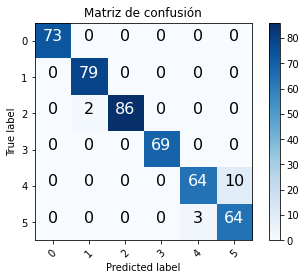

In [43]:
# %load Clasificacion_2D.py
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score,classification_report
import pandas as pd

#%% Cargar dataset
db_name= '2D_6_clases_hard.csv' # evaluar con otros data
df= pd.read_csv(datadir+ db_name)
data= df.values
x= data[:,0:-1]
y= data[:,-1] # suponemos que el target está en la última columna. Cuidado con esto!
n_clases= np.max(y)+1

print(df.hist())
sns.pairplot(data=df, hue='target', palette='RdBu')

#%% PARAM
PLOT_CONF_MAT= 1
PLOT_ROC= 1
PLOT_BOUNDARY= 1
PLOT_SIGMOID= 1
NORMALIZAR= 1

# parámetros de la red
LAYERS_SIZES= (20) # cantidad de neuronas ocultas en cada capa
MAX_ITE= 500
TOLERANCE=  1e-4 #tol : float, optional, default 1e-4
SOLVER= 'adam'##, sgd, adam, lbfgs
ACT_FX= 'tanh'#{identity, logistic, tanh, relu},
alpha= 0.003 #default=0.001

#%% Dividir Training/testing
porc_test= 0.3
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= porc_test)
print("\t %d datos para training" %x_train.shape[0])
print("\t %d datos para testing" %x_test.shape[0])

#%% Normalizar los datos
from sklearn.preprocessing import StandardScaler  
if (NORMALIZAR):
    scaler = StandardScaler()  
    # Don't cheat - fit only on training data
    scaler.fit(x_train)  
    x_train = scaler.transform(x_train)  
    # apply same transformation to test data
    x_test = scaler.transform(x_test)  
    # para los graficos
    x= scaler.transform(x)
    
#%% Entrenamiento del modelo
modelo= MLPClassifier(hidden_layer_sizes=LAYERS_SIZES, max_iter=MAX_ITE, tol= TOLERANCE, verbose= False, activation= ACT_FX, learning_rate_init=alpha, solver=SOLVER)
# modelo= LogisticRegression(class_weight={1:0.5, 0:0.5}) 
# puede probar con otros clasificadores. Ej. KNeighborsClassifier(n_neighbors=5)

modelo.fit(x_train,y_train)

# w= modelo.coefs_
# b= modelo.intercepts_

#%% eficacia del modelo
y_pred_train= modelo.predict(x_train)
print("*****************************************************")
print("Train   Accuracy: %.2f" % accuracy_score(y_train, y_pred_train ))
print(classification_report(y_train, y_pred_train))

y_pred= modelo.predict(x_test)
print("*****************************************************")
print("Test   Accuracy: %.2f" % accuracy_score(y_test, y_pred ))
print(classification_report(y_test, y_pred))
print("*****************************************************")

y_pred_proba= np.max(modelo.predict_proba(x_test), axis=1)
print("Análisis de probabilidades: mean %.2f,  std %.2f" % (y_pred_proba.mean(), y_pred_proba.std()))

#%% plot boundary
if ((PLOT_BOUNDARY) & (x.shape[1]==2)):
    utn_utils1.plot_frontera_de_decision_2D(modelo, x_train, y_train, x_test=x_test, y_test=y_test, sigmoid=PLOT_SIGMOID)

#%% ROC
if (PLOT_ROC & (n_clases==2)):
    utn_utils1.plot_ROC_curve(modelo, x_test, y_test)

#%% CONFUSION MATRIX
if (PLOT_CONF_MAT):
    y_pred= modelo.predict(x_test)
    utn_utils1.plot_confusion_matrix(y_test, y_pred)

